## Mid-project Demo

In [1]:
# some useful mysklearn package import statements and reloads
import importlib
import os
from tabulate import tabulate

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

### Showing Data Spread for NBA Statistics

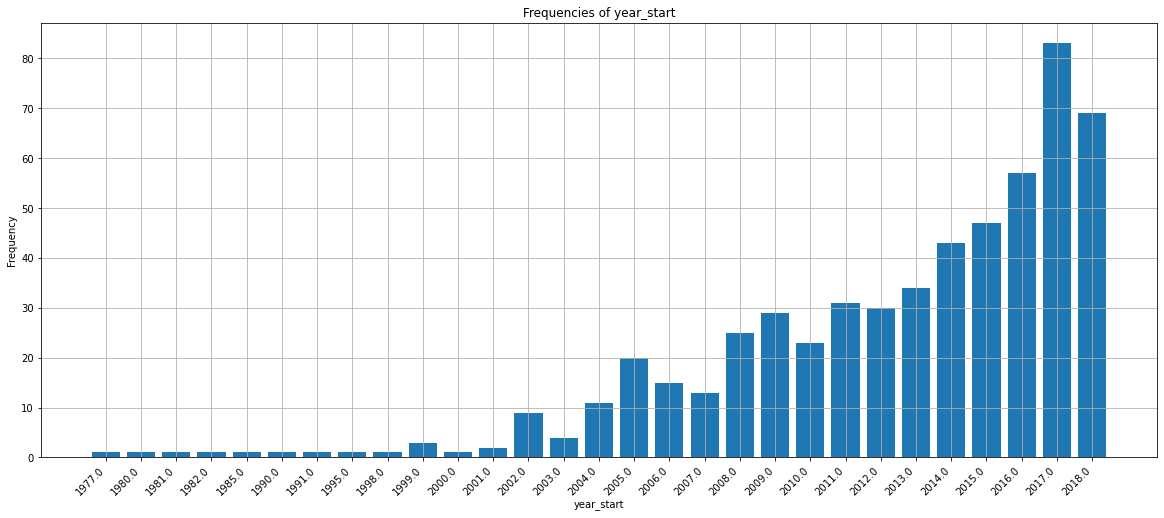

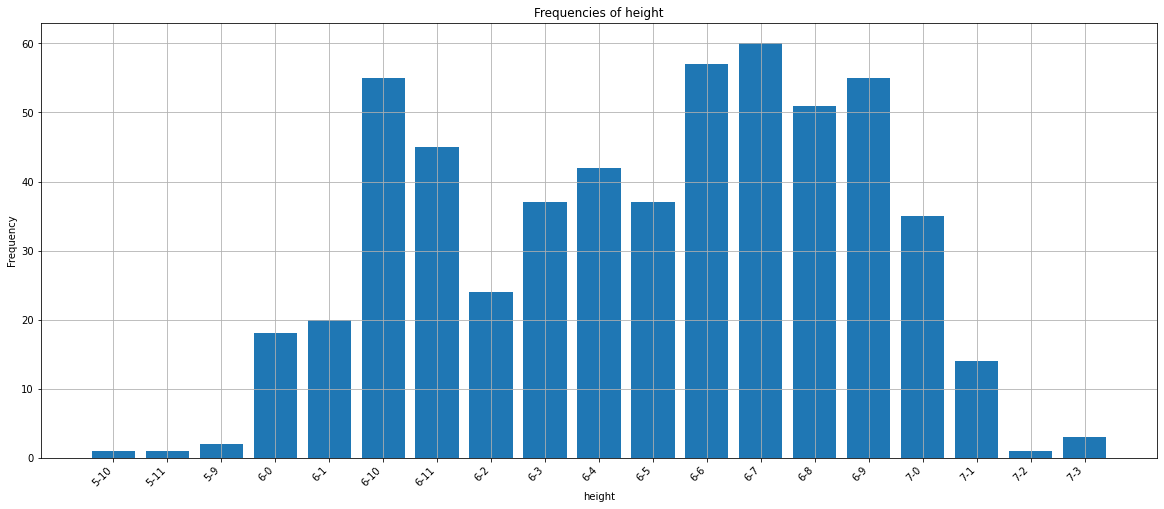

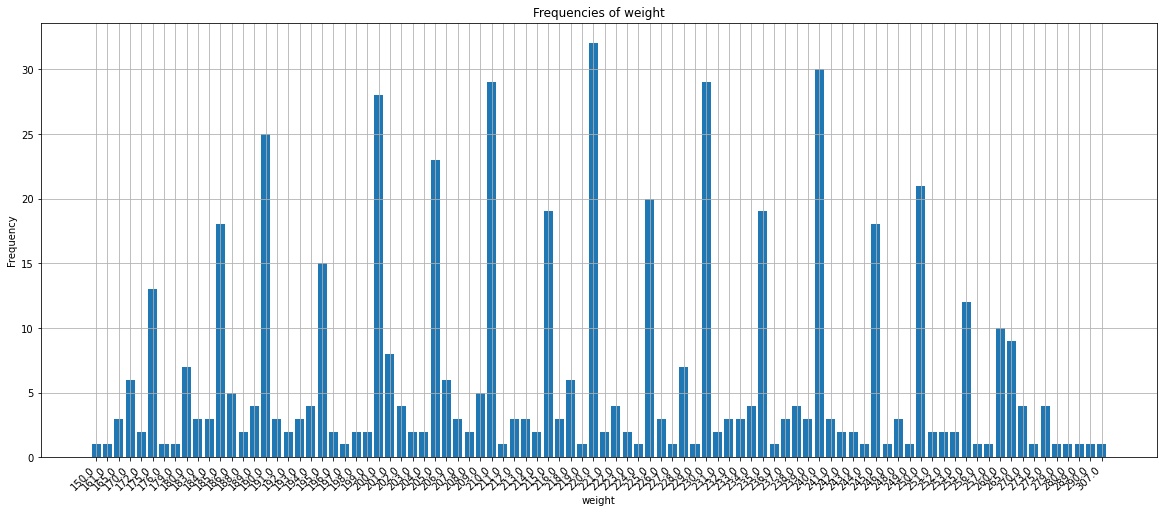

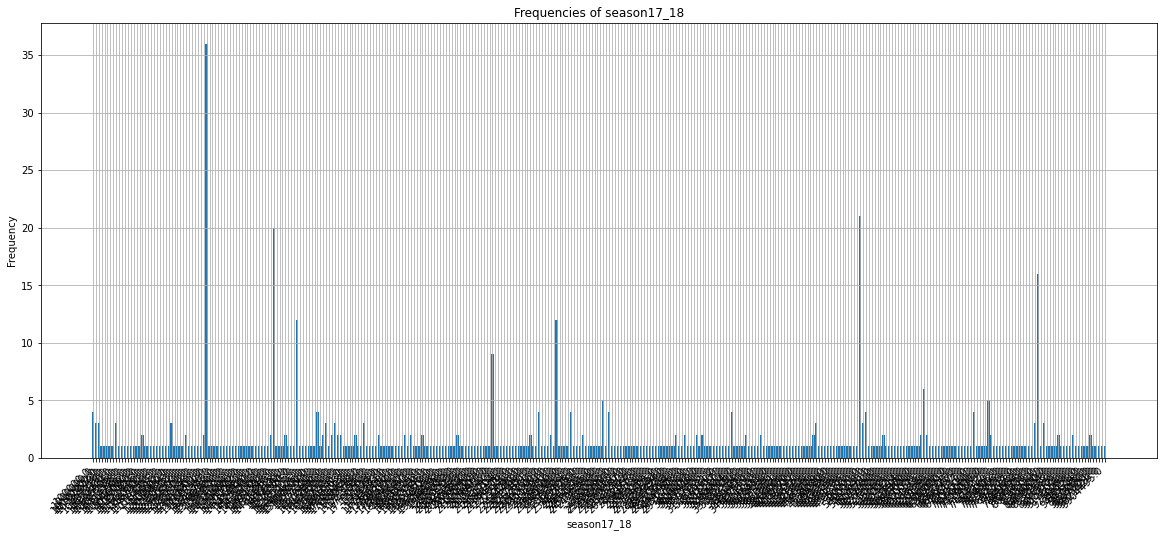

In [2]:
importlib.reload(myutils)

fname = os.path.join("input_data", "joined_data.csv")
table = MyPyTable().load_from_file(fname)

myutils.show_frequencies(table, "year_start")
myutils.show_frequencies(table, "height")
myutils.show_frequencies(table, "weight")
myutils.show_frequencies(table, "season17_18")

In [23]:
importlib.reload(myutils)
importlib.reload(myevaluation)

# year_start, height, weight -> season17_18
year_start_col = table.get_column("year_start", True)
height_col = table.get_column("height", True)
weight_col = table.get_column("weight", True)
X = [[year_start_col[i], height_col[i], weight_col[i]] for i in range(len(weight_col))]
y = table.get_discretized_column(myutils.transform_salary, "season17_18")

X_train_folds, X_test_folds = myevaluation.stratified_kfold_cross_validation(X, y, n_splits=10)
y_predicted = []
y_actual = []
for i in range(len(X_train_folds)):
    X_train = [X[j] for j in X_train_folds[i]]
    y_train = [y[j] for j in X_train_folds[i]]
    X_test = [X[j] for j in X_test_folds[i]]
    y_test = [y[j] for j in X_test_folds[i]]
    dt_classifier = MyDecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    y_predicted.extend(dt_classifier.predict(X_test))
    y_actual.extend(y_test)
    
matrix = myevaluation.confusion_matrix(y_actual, y_predicted, [i for i in range(1, 6)])
accuracy = myutils.calculate_accuracy(matrix)
error_rate = myutils.calculate_error_rate(matrix)

print("10-Fold Cross Validation")
print("Decision Tree: accuracy = {}, error rate = {}".format(accuracy, error_rate))

10-Fold Cross Validation
Decision Tree: accuracy = 0.4226415094339623, error rate = 0.5773584905660377
